## Task: Build and Train an MLP in PyTorch on the Fashion-MNIST Dataset

The goal of this assignment is to create a fully connected neural network (MLP – Multilayer Perceptron) and train it to classify clothing images from the Fashion-MNIST dataset.

### Dataset:
Fashion-MNIST contains 28x28 grayscale images of 10 clothing categories, such as shirts, trousers, and shoes. It is a drop-in replacement for the classic MNIST dataset.

### What you will do:
1. Load and visualize a few samples from the dataset.
2. Preprocess the dataset and prepare DataLoaders.
3. Design your own MLP architecture using PyTorch.
4. Train the network and evaluate accuracy on the test set.
5. (Bonus) Try using dropout, different activation functions, or varying the architecture.

---

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

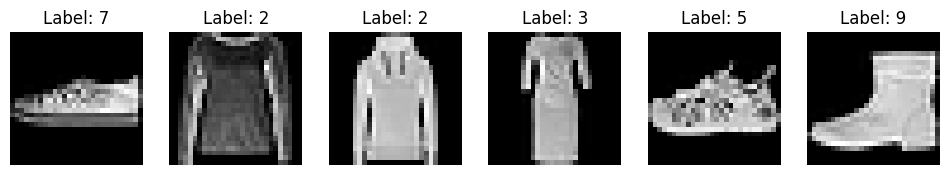

In [3]:
examples = iter(train_loader)
images, labels = next(examples)

fig, axes = plt.subplots(1, 6, figsize=(12, 2))
for i in range(6):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].set_title(f"Label: {labels[i].item()}")
    axes[i].axis('off')
plt.show()

## 🏗️ TODO 1: Define your own neural network architecture
- Use `nn.Module`
- Input size is 784 (flattened 28x28 image)
- Output layer should have 10 units (for 10 classes)

In [ ]:
class MyNeuralNetwork(nn.Module):
    def __init__(self):
        super(MyNeuralNetwork, self).__init__()
        self.model = ...  # Define your neural network architecture here

    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.model(x)

## 🏃 TODO 2: Train your network
- Use `CrossEntropyLoss`
- Optimizer: e.g., `Adam`
- Train for at least 5 epochs
- Print loss or accuracy after each epoch

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MyNeuralNetwork().to(device)
criterion = ... # Define your loss function here
optimizer = ... # Define your optimizer here

for epoch in range(5):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

Epoch 1, Loss: 0.5127
Epoch 2, Loss: 0.3804
Epoch 3, Loss: 0.3387
Epoch 4, Loss: 0.3164
Epoch 5, Loss: 0.2970


## ✅ TODO 3: Evaluate your network on the test data
- Calculate and print the accuracy
- (Optional) Display the confusion matrix

In [6]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 87.03%
